# ANN & Fashion MNIST
---
By Margaret Maynard-Reid, 4/24/2018

![alt text](https://github.com/margaretmz/deep-learning/blob/master/images/modern%20dl_fash-mnist_keras.png?raw=1)

## Why Fashion-MNIST?


*   MNIST is too easy
*   MNIST is overused
*   MNIST can not represent modern Computer Vision tasks

Read more about the Fashion-MINST dataset in this paper [here](https://arxiv.org/abs/1708.07747) (**Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms**)



In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

4422102/4422102 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28) y_train shape: (60000,)


## Visualize the data 반복실행 해보자

x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set
y = 7 Sneaker


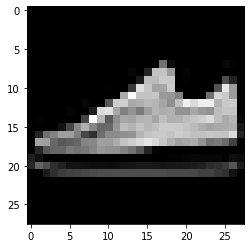

In [3]:
# Print training set shape - note there are 60,000 training data of image size of 28x28, 60,000 train labels)
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training and test datasets
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

# Image index, you can pick any number between 0 and 59,999
img_index = np.random.randint(0, 59999)
# y_train contains the lables, ranging from 0 to 9
label_index = y_train[img_index]
# Print the label, for example 2 Pullover
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
# # Show one of the images from the training dataset
plt.imshow(x_train[img_index], cmap='gray')

In [4]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


##  코딩 task!

1. 전처리
    * x : sc_____
    * y : _______ encoding

2. 모델링
    * model에 모델 선언
    * Input layer에 어떻게 전달할 것인지 고민 필요
    * 쭈우우우욱 늘려주는 레이어를 사용할 것 (F______)
    * 히든레이어는 최소 3개를 쓸 것!
    * 노드 수는 512개를 기본으로 시작
    * 자유롭게 바꿔가며 성능을 볼 것

3. 학습
    * epochs=50, validation_split=0.2
    * early stopping

In [5]:
#############
# Your Code #
#############
# min-max scaling
max_n, min_n = x_train.max(), x_train.min()
max_n, min_n

(255, 0)

In [6]:
x_train = (x_train - min_n) / (max_n - min_n)
x_test = (x_test - min_n) / (max_n - min_n)

In [7]:
x_train.max(), x_train.min()

(1.0, 0.0)

In [8]:
#############
# Your Code # One-Hot Encoding
#############
from tensorflow.keras.utils import to_categorical

In [9]:
len_n = len(set(y_train))

In [10]:
y_train = to_categorical(y_train, len_n)
y_test = to_categorical(y_test, len_n)

In [11]:
y_train.shape

(60000, 10)

In [12]:
#############
# Your Code # Sequential API
#############
# 2. 모델링
#     * model에 모델 선언
#     * Input layer에 어떻게 전달할 것인지 고민 필요
#     * 쭈우우우욱 늘려주는 레이어를 사용할 것 (F______)
#     * 히든레이어는 최소 3개를 쓸 것!
#     * 노드 수는 512개를 기본으로 시작
#     * 자유롭게 바꿔가며 성능을 볼 것

# 3. 학습
#     * epochs=50, validation_split=0.2
#     * early stopping

# 1번 세션 클리어
keras.backend.clear_session()

# 2번 모델 선언
model = keras.models.Sequential()

# 3번 모델 블록 조립
model.add( keras.layers.Input(shape=(28,28)) )
model.add( keras.layers.Flatten() )
model.add( keras.layers.Dense(512, activation='relu') )
model.add( keras.layers.Dense(512, activation='relu') )
model.add( keras.layers.Dense(512, activation='relu') )
model.add( keras.layers.Dense(10, activation='softmax') )

# 4번 컴파일
model.compile(loss=keras.losses.CategoricalCrossentropy(), metrics=['accuracy'],
              optimizer='adam')

#### 모델 요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 932,362
Trainable params: 932,362
Non-trainable params: 0
_________________________________________________________________


In [13]:
#############
# Your Code # Early Stopping
#############
from tensorflow.keras.callbacks import EarlyStopping

In [14]:
es = EarlyStopping(monitor='val_loss',         # 관측 대상
                   patience=3,                 # 관측 대상 성능이 개선되지 않을 때 얼마나 더 지켜볼래
                   min_delta=0,                # 임계값.
                   verbose=1,                 
                   restore_best_weights=True)  # 최적 epoch의 가중치를 적용!

In [15]:
model.fit(x_train, y_train, epochs=100, verbose=1,
          validation_split=0.2, callbacks=[es])

Epoch 1/100
1500/1500 [==============================] - 11s 4ms/step - loss: 0.4994 - accuracy: 0.8181 - val_loss: 0.4105 - val_accuracy: 0.8541
Epoch 2/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3738 - accuracy: 0.8641 - val_loss: 0.3947 - val_accuracy: 0.8604
Epoch 3/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3375 - accuracy: 0.8758 - val_loss: 0.3345 - val_accuracy: 0.8786
Epoch 4/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3133 - accuracy: 0.8850 - val_loss: 0.3360 - val_accuracy: 0.8775
Epoch 5/100
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2927 - accuracy: 0.8910 - val_loss: 0.3362 - val_accuracy: 0.8816
Epoch 6/100
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2768 - accuracy: 0.8964 - val_loss: 0.3548 - val_accuracy: 0.8800
Epoch 6: early stopping


## Visualize prediction

위에서 지키라고 한 사항들 안지키면 동작을 안할껄...?

In [16]:
score = model.evaluate(x_test, y_test, verbose=1)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])
y_hat = model.predict(x_test).argmax(axis=1)

313/313 [==============================] - 1s 3ms/step - loss: 0.3625 - accuracy: 0.8703

 Test accuracy: 0.8702999949455261
313/313 [==============================] - 1s 2ms/step


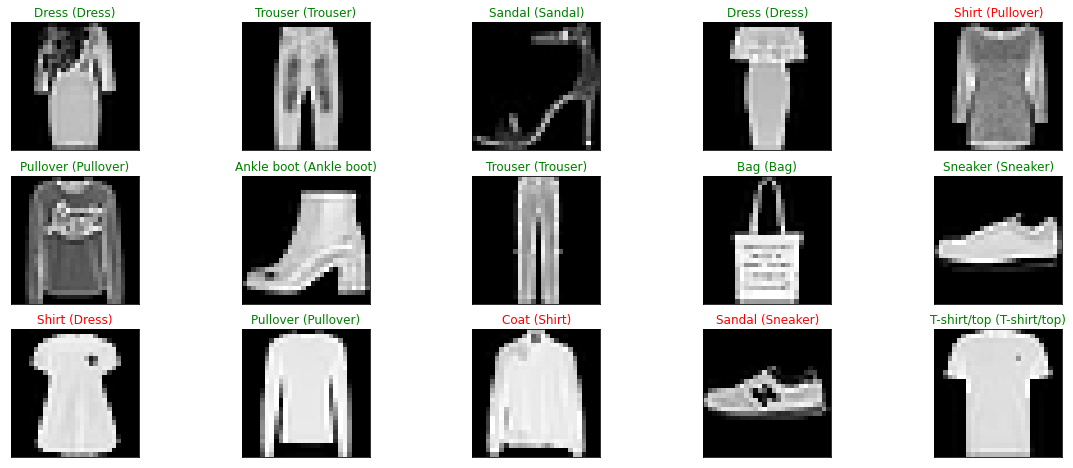

In [20]:
####### 반복실행해보자

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index].reshape([28,-1]) ), cmap='gray' )
    predict_index = y_hat[index]
    true_index = y_test[index].argmax(axis=0)
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))